# Aggregating time series data and comparing distributions 

Today's goals are to compare three time series with different properties

1. Temperature
2. Precipitation
3. Streamflow 

You will also get to practice your pandas skills. 


In [10]:
# first lets import pandas and matplotlib mopdules 
import pandas as pd
import matplotlib.pyplot as plt 
# The below command is to make sure figures show up in your notebook
%matplotlib inline 

Now we need to read our data. Let's do the weather station data first, which we already loaded last week. 
The data csv file is is location in the `W3_1_WeatherDataTimeSeries/data/` folder and named `USC00442208_19000101-20240122.csv`

In [13]:
# complete the line below to point to the correct weather data file
weatherDataPath = "../../W3_1_WeatherDataTimeSeries/data/USC00442208_19000101-20240122.csv"
#weatherDataPath = "USC00442208_19000101-20240122.csv"

#
weatherData = pd.read_csv(weatherDataPath,
                    #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                    parse_dates = ['DATE'],
                    #  Set DATE as the index so you can subset data by time period
                    index_col = ['DATE']
                      )


weatherData

,STATION,NAME,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,,,
1900-01-01,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1900-01-02,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
1900-01-03,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
1900-01-04,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
1900-01-05,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,NaN,NaN,NaN,NaN
2024-01-19,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,2.5,18.0,25.0,NaN,NaN,NaN,NaN
2024-01-20,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,NaN,NaN,NaN,NaN


Next we will read the stream discharge data. Before loading the data have a look at the file contents, located in the `data`-directory. You will see some key differences between the weather station data and this data. 

- There are quite a few lines without data, that we have to skip
- Data is delimited by `Tab` and not `,`

[`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) has many options that help us to deal with pretty complex files. Here we set `skiprows` and `delimiter`. We also provide a list of column names for our data frame. 

In [14]:
dischargeData = pd.read_csv('../data/USGS_01622000.txt', 
                        skiprows=31,
                        delimiter='\t', 
                        names = ['agency', 'stationID', 'date','discharge_cfs','label'], # I am
                        parse_dates = ['date'],
                        index_col = ['date'])
dischargeData 

,agency,stationID,discharge_cfs,label
date,,,,
1927-01-01,USGS,1622000,684.0,A
1927-01-02,USGS,1622000,610.0,A
1927-01-03,USGS,1622000,573.0,A
1927-01-04,USGS,1622000,492.0,A
1927-01-05,USGS,1622000,455.0,A
...,...,...,...,...
2024-02-06,USGS,1622000,376.0,P
2024-02-07,USGS,1622000,327.0,P
2024-02-08,USGS,1622000,289.0,P


Right now our data is in two different dataframes. Lets change that and merge all data into a single data frame. 

Note: [Combining dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) can be complicated very quickly, depending on how exactly you want to do it. 

In our case, we want to aling our data by the date, which is the `index` of both dataframes. 

We can simply copy the `'TMAX'` and `PRCP` columns to a new dataframe and then add assing the discharge data to a new column in the same dataframe called `discharge`. 



In [15]:
# Complete the code below and check what happened. How was the data alinged? 
listOfColumns = ['TMAX', 'PRCP']
dataCombined = weatherData[listOfColumns].copy() 
dataCombined['discharge']= dischargeData['discharge_cfs'] 

dataCombined

,TMAX,PRCP,discharge
DATE,,,
1900-01-01,-5.6,0.0,NaN
1900-01-02,1.7,0.0,NaN
1900-01-03,2.8,0.0,NaN
1900-01-04,5.6,0.0,NaN
1900-01-05,11.7,0.0,NaN
...,...,...,...
2024-01-18,NaN,0.0,447.0
2024-01-19,NaN,2.5,386.0
2024-01-20,NaN,0.0,321.0


Let's quickly look at 10 years of data using the temporal subsetting with `.loc[]`. How about for the time period between 1990 and 2000?

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

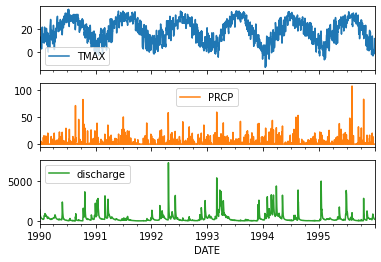

In [9]:
dataCombined.loc["1990":"1995"].plot(subplots = True)

Now lets look at some basic statistics using `.describe()`

In [8]:
# Enter your code here
dataCombined.describe()

,TMAX,PRCP,discharge
count,44855.000000,44847.000000,34285.000000
mean,18.604945,2.565030,390.540823
std,9.941317,7.195768,666.065337
min,-13.300000,0.000000,22.000000
25%,10.600000,0.000000,106.000000
50%,20.000000,0.000000,210.000000
75%,27.200000,1.300000,429.000000
max,40.600000,254.000000,32000.000000


<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
What do you notice about the data?

Do these statistics tell use something important?

</div>

The answer is yes, there is something important, but that is way easier to see using plots.

`Histograms` and `boxplots` are both graph types that visualize distributions. 

Let's create histograms first for all three variables.  

You can either create three separate histograms. Try this! You should add sensible bin numbers (`bins`) and labels to your figures. You should also set the xlimit to make sure the plots look sensible `xlim=[start, end].
The [`.plot()` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) shows you all the options. You can also look at the previos week's code.

<AxesSubplot:ylabel='Frequency'>

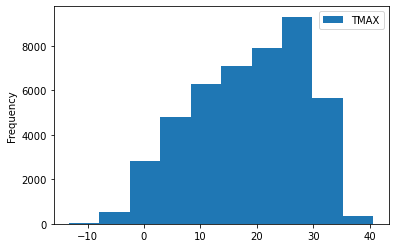

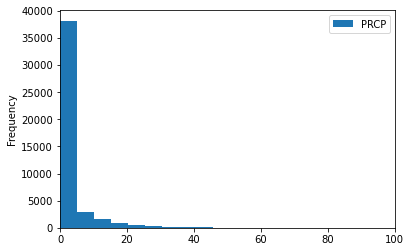

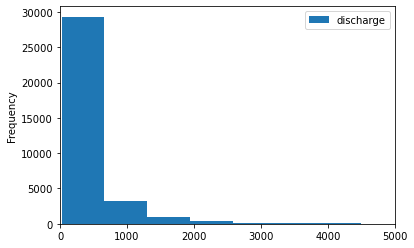

In [26]:
# Complete the 3 plots 
dataCombined.plot(kind='hist', y='TMAX' )
dataCombined.plot(kind='hist', y='PRCP', bins =50, xlim=[0, 100] )
dataCombined.plot(kind='hist', y='discharge', bins =50 ,xlim=[0, 5000] )
#...


You can also have _matplotlib_ do all of them at the same time in subplots by setting the `subplots=True`. See what happens. 

In [ ]:
dataCombined.plot(kind='hist', subplots=True)

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
What is the problem here? 

</div>


[Box plots](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) are another more compact way of describing the data. Let's focus on streamflow for a moment and create a new plot with setting `kind='box'`. 


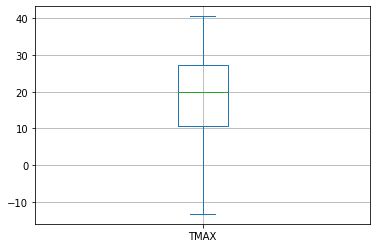

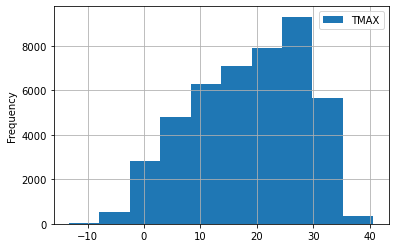

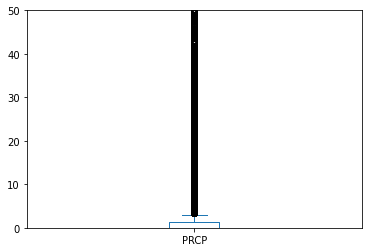

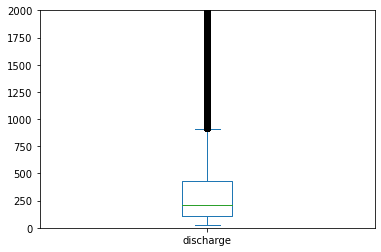

In [40]:
ax = dataCombined.plot(kind='box', y='TMAX')
ax.grid(True)
dataCombined.plot(kind='hist', y='TMAX', grid = True)
ax = dataCombined.plot(kind='box', y='PRCP', ylim=[0, 50])
ax = dataCombined.plot(kind='box', y='discharge', ylim=[0, 2000])

Before we move on to climate data, lets inspect `'PRCP'`. Unlike temperature and discharge, we don't expect rain on most days and so we have a lot of zeros in the data set, which are real data. 

We can use the `.loc[]` command with a condition (for example `dataCombined['PRCP'] > 0` to select only days with precipitation. 
Using the `.count()` we get the number of non-zeros. 

**Quick challenge: What the the change of rain on any given day? How would you do that?**

In [ ]:
condition = dataCombined['PRCP']>0
dataCombined['PRCP'].loc[condition].count()



## Aggregating weather data to climate data

Because there is a lot of variability between years, we need to aggregate our data to [climate periods](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals), typically taken to be 30-years of data.

Luckily you already know how to do that using `.pivot_table`

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>
    
- Use the pivot_table function to create
    - mean monthly temperature
    - total (sum) monthly precipitation
    - mean monthly discharge 
- Select data from 1990 to 2020
- Create three plots showing your results. 
</div>



In [ ]:
dataCombined['year']=dataCombined.index.year
dataCombined['month']=dataCombined.index.month

# Complete the code below for the pivot tables and the plots 

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
How do you explain these data?

What do you notice about streamflow, when looking at precipitation?

Do they likely influence each other

</div>

We can also plot these two as a scatter plot to investigate further. 

In [ ]:
dataCombined.plot(kind='scatter',x='PRCP',y='discharge')


# Take-away/ Conclusions

- Why does this matter? 
- Why do we need to know the shape of the variable distributions, when we think about climate data and climate risk? 
    - What do you think? 

